<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Linear_Regression_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear**

In [1]:
# Considerando os dados abaixo
dados_dic = { 'X': [1, 2, 3, 4, 5], 'Y' : [1.3, 1.8, 3.5, 4, 4.6] }

import pandas as pd
dados = pd.DataFrame(dados_dic)

In [ ]:
dados.head()

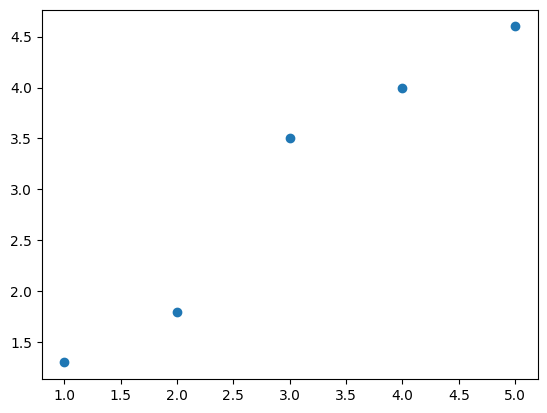

In [4]:
# Visualizando os valores graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(dados['X'], dados['Y'] )
plt.show()

In [5]:
# Criando o campo y_reta = X para traçar uma reta
dados['y_reta'] = dados['X']
dados.head()

,X,Y,y_reta
0,1,1.3,1
1,2,1.8,2
2,3,3.5,3
3,4,4.0,4
4,5,4.6,5


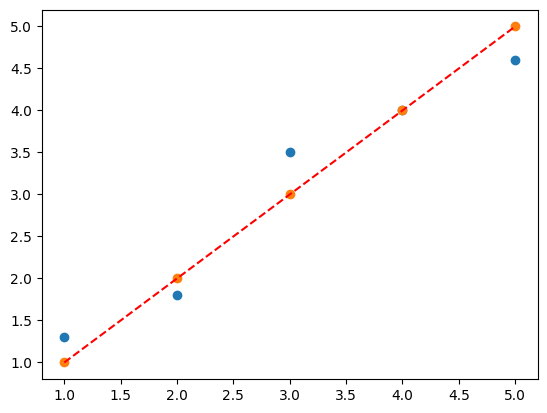

In [16]:
# Traçando a reta
fig, ax = plt.subplots()
ax.scatter( dados['X'], dados['Y'])
ax.plot( dados['X'], dados['y_reta'], '--r')
ax.scatter( dados['X'], dados['y_reta'])
plt.show()

In [8]:
# Importando a Regressão Linear
from sklearn.linear_model import LinearRegression

In [13]:
# Criando o modelo
modelo = LinearRegression().fit(dados['X'].values.reshape(-1, 1), dados['Y'])

In [20]:
# Coeficiente angular
a = modelo.coef_[0]

In [21]:
# Coeficiente linear
b = modelo.intercept_

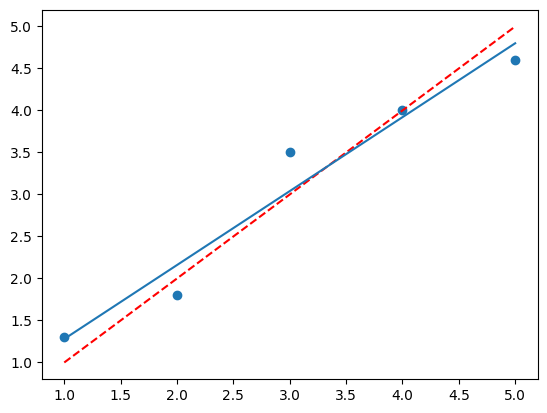

In [25]:
# Traçando a reta gerada pelo modelo
fig, ax = plt.subplots()
ax.scatter(dados['X'], dados['Y'])
ax.plot(dados['X'], dados['y_reta'], '--r')

# y = ax + b
X = dados['X']
y = a * X + b

ax.plot(X, y)

plt.show()


In [28]:
# Passando a previsão e adicionando na base
y_pred = modelo.predict( dados['X'].values.reshape(-1, 1))
dados['y_pred'] = y_pred

dados.head()

,X,Y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [30]:
# Calculando o erro da reta VERMELHA (y_reta) e da regressão
dados['erro_reta'] = (dados['Y'] - dados['y_reta']) ** 2
dados['erro_pred'] = (dados['Y'] - dados['y_pred']) ** 2
dados.head()

,X,Y,y_reta,y_pred,erro_reta,erro_pred
0,1,1.3,1,1.28,0.09,0.0004
1,2,1.8,2,2.16,0.04,0.1296
2,3,3.5,3,3.04,0.25,0.2116
3,4,4.0,4,3.92,0.00,0.0064
4,5,4.6,5,4.80,0.16,0.0400


In [34]:
# Verificando a base e a soma dos erros
dados[['erro_reta', 'erro_pred']].mean()

erro_reta    0.1080
erro_pred    0.0776
dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(dados['Y'], dados['y_pred'])
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0776
